In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [2]:
student_course_ratings_df = pd.read_csv('rs_content_test.csv')
student_course_ratings_df

,user,item,rating
0,1502801,RP0105EN,3.0
1,1609720,CNSC02EN,2.0
2,1347188,CO0301EN,3.0
3,755067,ML0103EN,3.0
4,538595,BD0115EN,3.0
...,...,...,...
9397,1385217,EE0101EN,3.0
9398,1864644,DA0101EN,3.0
9399,435858,TMP0105EN,3.0
9400,1888188,DB0101EN,3.0


In [3]:
student_course_ratings_df.shape

(9402, 3)

In [17]:
rating_sparse_df = student_course_ratings_df.pivot(index='user', columns='item', values='rating').fillna(0).reset_index().rename_axis(index=None, columns=None)
rating_sparse_df

,user,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,...,SECM03EN,ST0101EN,SW0101EN,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0105EN,WA0101EN,WA0103EN
0,37465,0.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50348,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70434,0.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,85625,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2061096,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,2074313,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,2074462,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,2082818,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
rating_sparse_df.shape

(1000, 106)

In [6]:
user_df = rating_sparse_df.set_index('user')
cosine_sim = cosine_similarity(user_df)
cosine_sim_df = pd.DataFrame(cosine_sim, index=user_df.index, columns=user_df.index)
cosine_sim_df

user,37465,50348,52091,70434,85625,108541,109915,134697,142685,149690,...,2050073,2052832,2056704,2056952,2057052,2061096,2074313,2074462,2082818,2087663
user,,,,,,,,,,,,,,,,,,,,,
37465,1.000000,0.309244,0.099449,0.350857,0.209657,0.676123,0.169031,0.179284,0.083592,0.629941,...,0.154303,0.308607,0.142857,0.534522,0.179284,0.569803,0.503953,0.000000,0.122988,0.257143
50348,0.309244,1.000000,0.143519,0.253167,0.151282,0.365902,0.243935,0.215610,0.180951,0.363636,...,0.445362,0.445362,0.412325,0.289271,0.388098,0.411152,0.454545,0.222681,0.128186,0.274883
52091,0.099449,0.143519,1.000000,0.000000,0.000000,0.117670,0.000000,0.208013,0.213370,0.087706,...,0.107417,0.214834,0.099449,0.186052,0.124808,0.158666,0.175412,0.107417,0.000000,0.358017
70434,0.350857,0.253167,0.000000,1.000000,0.514917,0.415139,0.138380,0.000000,0.114056,0.309426,...,0.000000,0.000000,0.000000,0.328196,0.000000,0.279887,0.206284,0.000000,0.100686,0.070171
85625,0.209657,0.151282,0.000000,0.514917,1.000000,0.248069,0.124035,0.000000,0.061340,0.277350,...,0.000000,0.000000,0.000000,0.196116,0.000000,0.167248,0.092450,0.000000,0.270746,0.062897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061096,0.569803,0.411152,0.158666,0.279887,0.167248,0.539360,0.269680,0.286039,0.200049,0.402015,...,0.246183,0.369274,0.341882,0.533002,0.429058,1.000000,0.502519,0.123091,0.000000,0.273505
2074313,0.503953,0.454545,0.175412,0.206284,0.092450,0.596285,0.298142,0.158114,0.294884,0.444444,...,0.272166,0.272166,0.503953,0.471405,0.316228,0.502519,1.000000,0.136083,0.108465,0.377964
2074462,0.000000,0.222681,0.107417,0.000000,0.000000,0.182574,0.182574,0.000000,0.180579,0.000000,...,0.166667,0.333333,0.154303,0.144338,0.193649,0.123091,0.136083,1.000000,0.000000,0.185164


In [7]:
train_ratio = 0.8
train_size = int(train_ratio * len(rating_sparse_df))
train_set = rating_sparse_df[:train_size]
test_set = rating_sparse_df[train_size:]

In [8]:
def calculate_mean_f1_score(relevant_labels, predicted_labels):
  f1 = f1_score(relevant_labels, predicted_labels)
  return f1

In [9]:
f1_scores = []

def recommend_courses(user_id, rating_df, similarity_df, top_n=5):
  user_ratings = rating_df.loc[user_id]
  user_similarity = similarity_df.loc[user_id]
  similar_users = user_similarity.sort_values(ascending=False)
  similar_users = similar_users.drop(user_id)
  similar_users = similar_users.head(50)
  similar_users_id = list(similar_users.index)
  unrated_courses = user_ratings[user_ratings == 0].index
  recommended_courses = []

  target_user_vec = (rating_sparse_df[rating_sparse_df['user'] == user_id].iloc[0]).tolist()
  target_user_vec.pop(0)
  target_user_binary = [1 if value != 0 else 0 for value in target_user_vec]
  user_f1_score = 0

  for same_user in similar_users_id:
    same_user_vec = (rating_sparse_df[rating_sparse_df['user'] == same_user].iloc[0]).tolist()
    same_user_vec.pop(0)
    same_user_binary = [1 if value != 0 else 0 for value in same_user_vec]
    user_f1_score += calculate_mean_f1_score(target_user_binary, same_user_binary)
  user_f1_score = user_f1_score / len(similar_users_id)
  f1_scores.append(user_f1_score)

  for course in unrated_courses:
    course_ratings = rating_df[course]
    similar_users_ratings = rating_df.loc[similar_users.index, course]
    weighted_rating = (similar_users_ratings * similar_users).sum() / similar_users.sum()
    recommended_courses.append((course, weighted_rating))

  recommended_courses.sort(key=lambda x: x[1], reverse=True)

  return recommended_courses[:top_n]

In [10]:
test_set

,user,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,...,SECM03EN,ST0101EN,SW0101EN,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0105EN,WA0101EN,WA0103EN
800,1570208,3.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
801,1571241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
802,1571271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
803,1571316,3.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
804,1573190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2061096,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,2074313,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,2074462,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,2082818,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
user_id = 1571271	 # Give user_id of any of the users from the test_set
top_recommendations = recommend_courses(user_id, user_df, cosine_sim_df, top_n=5)
print("Top recommended courses for user", user_id, ":")
for i, (course, weighted_rating) in enumerate(top_recommendations, start=1):
  print(f"{i}. Course: {course}, Weighted Rating: {weighted_rating}")

Top recommended courses for user 1571271 :
1. Course: DS0101EN, Weighted Rating: 1.1963872982437729
2. Course: ML0115EN, Weighted Rating: 0.7696200623596573
3. Course: BD0101EN, Weighted Rating: 0.7007626264325707
4. Course: DS0105EN, Weighted Rating: 0.6857084117124367
5. Course: DS0103EN, Weighted Rating: 0.5679319094170169


In [12]:
def calculate_mae(actual, predicted):
  return mean_absolute_error(actual, predicted)

In [13]:
def calculate_rmse(actual, predicted):
  return np.sqrt(mean_squared_error(actual, predicted))

In [14]:
def calculate_mse(actual, predicted):
  return mean_squared_error(actual, predicted)

In [15]:
mae_scores = []
rmse_scores = []
mse_scores = []

for user_id in test_set['user']:
  recommended_courses = recommend_courses(user_id, user_df, cosine_sim_df, top_n=5)

  actual_ratings = [user_df.loc[user_id, course] for course, _ in recommended_courses]
  predicted_ratings = [rating for _, rating in recommended_courses]

  mae_scores.append(calculate_mae(actual_ratings, predicted_ratings))
  rmse_scores.append(calculate_rmse(actual_ratings, predicted_ratings))
  mse_scores.append(calculate_mse(actual_ratings, predicted_ratings))
  binary_pred = [0 if value < 0.6 else 1 for value in predicted_ratings]

mean_mae = np.mean(mae_scores)
mean_rmse = np.mean(rmse_scores)
mean_mse = np.mean(mse_scores)
mean_f1 = np.mean(f1_scores)

print(f"Mean Absolute Error (MAE): {mean_mae}")
print(f"Mean Square Error (RMSE): {mean_mse}")
print(f"Root Mean Square Error (RMSE): {mean_rmse}")
print(f"F1-Score : {mean_f1}")

Mean Absolute Error (MAE): 0.9466031807985337
Mean Square Error (RMSE): 1.0858701284508228
Root Mean Square Error (RMSE): 1.0003345184277286
F1-Score : 0.5674562792060421


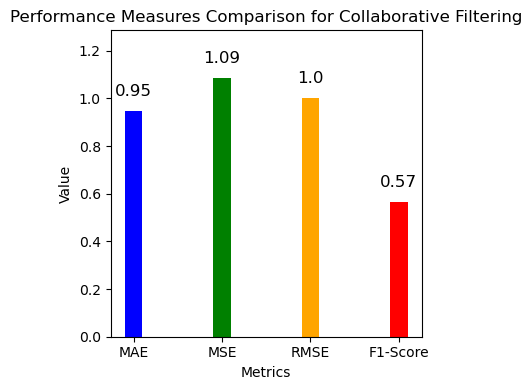

In [16]:
metrics = ['MAE', 'MSE', 'RMSE', 'F1-Score']
values = [mean_mae, mean_mse, mean_rmse, mean_f1]

# Create a bar plot
plt.figure(figsize=(4, 4))
plt.bar(metrics, values, width=0.2, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Measures Comparison for Collaborative Filtering')
plt.ylim(0, max(values) + 0.2)
for i, v in enumerate(values):
    plt.text(i, v + 0.05, str(round(v, 2)), ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()